In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Flat_dataset_moscow_outliers_removed.csv')

In [3]:
def percent_missing(my_df):
    result = 100 * my_df.isnull().sum() / len(my_df)
    result = result[result > 0].sort_values()
    return result
percent_nan = percent_missing(df)

In [4]:
df

,ID ЖК,ЖК рус,Район Город,Округ Направление,Застройщик ЖК,Площадь,Тип Комнатности,Этаж,Дата регистрации,класс,Срок сдачи,Отделка,Зона,Стадия строительства в дату ДДУ,Цена кв. м,SalePrice
0,4983,Авиатика,Хорошевский,САО,Э.К. Девелопмент,58.6,2,22,2022-05-24,комфорт,4 кв 2022,Есть,3) от ~ТТК до МКАД,идёт отделка,392820.0000,2.301925e+07
1,4983,Авиатика,Хорошевский,САО,Э.К. Девелопмент,90.7,3,11,2022-05-26,комфорт,4 кв 2022,Есть,3) от ~ТТК до МКАД,идёт отделка,368500.0000,3.342295e+07
2,4983,Авиатика,Хорошевский,САО,Э.К. Девелопмент,105.5,4,19,2022-05-17,комфорт,4 кв 2022,Есть,3) от ~ТТК до МКАД,идёт отделка,327900.0000,3.459345e+07
3,4983,Авиатика,Хорошевский,САО,Э.К. Девелопмент,22.2,ст,16,2022-05-17,комфорт,4 кв 2022,Есть,3) от ~ТТК до МКАД,идёт отделка,509600.0000,1.131312e+07
4,4983,Авиатика,Хорошевский,САО,Э.К. Девелопмент,88.8,3,15,2022-05-12,комфорт,4 кв 2022,Есть,3) от ~ТТК до МКАД,идёт отделка,369600.0000,3.282048e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22828,5151,Я51,Ярославский,СВАО,Patek,44.8,1,7,2022-01-14,комфорт,2 кв 2022,Нет,3) от ~ТТК до МКАД,верхние этажи,250602.9911,1.122701e+07
22829,5151,Я51,Ярославский,СВАО,Patek,37.3,1,2,2022-01-26,комфорт,2 кв 2022,Нет,3) от ~ТТК до МКАД,верхние этажи,250603.0027,9.347492e+06
22830,5151,Я51,Ярославский,СВАО,Patek,36.2,1,2,2022-01-26,комфорт,2 кв 2022,Нет,3) от ~ТТК до МКАД,верхние этажи,250603.0110,9.071829e+06
22831,5151,Я51,Ярославский,СВАО,Patek,76.7,3,15,2022-02-07,комфорт,2 кв 2022,Нет,3) от ~ТТК до МКАД,верхние этажи,220464.0026,1.690959e+07


In [5]:
df['Район Город'].sort_values().unique()

array(['Алексеевский', 'Бабушкинский', 'Басманный', 'Богородское',
       'Бутырский', 'Войковский', 'Головинский', 'Гольяново',
       'Даниловский', 'Дмитровский', 'Дорогомилово', 'Замоскворечье',
       'Западное Дегунино', 'Коптево', 'Котловка', 'Красносельский',
       'Крюково', 'Кунцево', 'Левобережный', 'Лефортово', 'Лианозово',
       'Люблино', 'Марфино', 'Марьина Роща', 'Метрогородок', 'Митино',
       'Можайский', 'Молжаниновский', 'Москворечье-Сабурово',
       'Нагатино-Садовники', 'Нагатинский Затон', 'Нагорный',
       'Некрасовка', 'Нижегородский', 'Ново-Переделкино', 'Обручевский',
       'Останкинский', 'Отрадное', 'Очаково-Матвеевское', 'Печатники',
       'Покровское-Стрешнево', 'Преображенское', 'Пресненский', 'Раменки',
       'Ростокино', 'Рязанский', 'Савелки', 'Савеловский', 'Свиблово',
       'Северное Измайлово', 'Сокол', 'Соколиная Гора', 'Солнцево',
       'Таганский', 'Текстильщики', 'Тимирязевский', 'Филевский Парк',
       'Хамовники', 'Хорошево-Мневник

## Поработаем с категориальными переменными
* Перекодируем их в числовые, но сначало посмотрим на них 

In [6]:
print(df['Район Город'].unique())
print(df['Округ Направление'].unique())
print(df['Тип Комнатности'].unique())
print(df['класс'].unique())
print(df['Срок сдачи'].unique())
print(df['Отделка'].unique())
print(df['Зона'].unique())
print(df['Стадия строительства в дату ДДУ'].unique())

['Хорошевский' 'Останкинский' 'Кунцево' 'Левобережный' 'Нижегородский'
 'Митино' 'Покровское-Стрешнево' 'Гольяново' 'Обручевский' 'Свиблово'
 'Рязанский' 'Филевский Парк' 'Басманный' 'Тимирязевский'
 'Очаково-Матвеевское' 'Богородское' 'Хамовники' 'Западное Дегунино'
 'Лианозово' 'Москворечье-Сабурово' 'Хорошево-Мневники' 'Раменки'
 'Дорогомилово' 'Замоскворечье' 'Текстильщики' 'Преображенское' 'Сокол'
 'Нагатино-Садовники' 'Марфино' 'Отрадное' 'Красносельский' 'Дмитровский'
 'Нагатинский Затон' 'Южное Чертаново' 'Савелки' 'Крюково' 'Даниловский'
 'Северное Измайлово' 'Щукино' 'Царицыно' 'Пресненский' 'Некрасовка'
 'Бабушкинский' 'Лефортово' 'Головинский' 'Можайский' 'Якиманка'
 'Печатники' 'Метрогородок' 'Солнцево' 'Люблино' 'Южнопортовый'
 'Марьина Роща' 'Молжаниновский' 'Войковский' 'Южное Бутово'
 'Южное Медведково' 'Ростокино' 'Бутырский' 'Алексеевский' 'Савеловский'
 'Ярославский' 'Соколиная Гора' 'Таганский' 'Нагорный' 'Коптево'
 'Ново-Переделкино' 'Котловка']
['САО' 'СВАО' 'ЗАО

In [7]:
#object_df = df.select_dtypes(include='object')
#numeric_df = df.select_dtypes(exclude='object')
#df_object_dummies = pd.get_dummies(object_df, drop_first=True)
#final_df = pd.concat([numeric_df, df_object_dummies], axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [9]:
le = LabelEncoder()

In [10]:
df['Район Город'] = le.fit_transform(df['Район Город'])

In [11]:
list_of_categorical_params = ['Район Город','Округ Направление','Тип Комнатности', 'класс', 'Отделка', 'Зона', 'Стадия строительства в дату ДДУ']

In [12]:
for i in list_of_categorical_params:
    df[i] = le.fit_transform(df[i])

In [13]:
df['класс'].unique()

array([2, 0, 1, 3, 5, 4])

C:\Users\Asus\AppData\Local\Temp\ipykernel_25540\1688019437.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

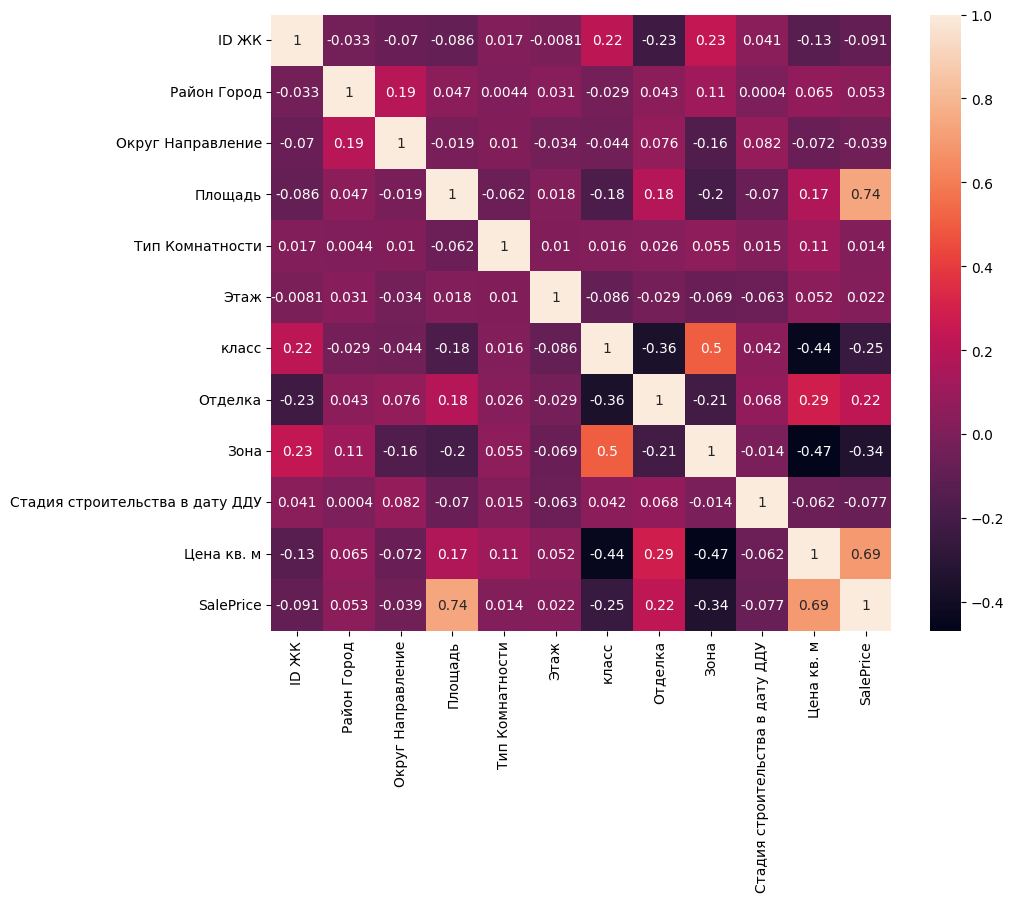

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

In [15]:
df.to_csv("Flat_Final_dataset_moscow_.csv",index=False)